In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [16]:

print("First few rows of the training data:")
print(train_data.head())



First few rows of the training data:
   id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0   0  15635502.0   Pirozzi        632.0    France  Female  63.0     5.0   
1   1  15595440.0   Horsley        730.0   Germany  Female  35.0     5.0   
2   2  15803566.0      Zito        598.0     Spain    Male  45.0     2.0   
3   3  15693906.0  Iloerika        678.0    France  Female  38.0     9.0   
4   4  15679531.0     K'ung        710.0    France  Female  32.0     4.0   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00            2.0        0.0             1.0        140780.80   
1  182532.23            2.0        1.0             1.0        136491.32   
2   94049.92            1.0        1.0             1.0        131718.12   
3       0.00            2.0        1.0             1.0        164768.82   
4       0.00            2.0        0.0             0.0        100187.43   

   Exited  
0     0.0  
1     0.0  
2     0.0  
3     0

In [17]:
print("\nInformation about the training data:")
print(train_data.info())




Information about the training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB
None


In [18]:
print("\nMissing values in the training data:")
print(train_data.isnull().sum())



Missing values in the training data:
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [19]:
print("\nDescriptive statistics for the training data:")
print(train_data.describe())




Descriptive statistics for the training data:
                 id    CustomerId   CreditScore           Age        Tenure  \
count  15000.000000  1.500000e+04  15000.000000  15000.000000  15000.000000   
mean    7499.500000  1.569244e+07    658.829933     37.854200      5.049733   
std     4330.271354  7.176181e+04     73.688724      8.199542      2.786571   
min        0.000000  1.556580e+07    431.000000     18.000000      0.000000   
25%     3749.750000  1.563298e+07    602.000000     32.000000      3.000000   
50%     7499.500000  1.569018e+07    661.000000     37.000000      5.000000   
75%    11249.250000  1.575798e+07    710.000000     42.000000      7.000000   
max    14999.000000  1.581566e+07    850.000000     72.000000     15.000000   

            Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count  1.500000e+04   15000.000000  15000.000000    15000.000000   
mean   4.394991e+04       1.582600      0.785133        0.494200   
std    1.393448e+05       0.528768   

In [21]:

print("\nDistribution of the target variable 'Exited':")
print(train_data['Exited'].value_counts())




Distribution of the target variable 'Exited':
Exited
0.0    11937
1.0     3063
Name: count, dtype: int64


In [27]:
object_cols = train_data.select_dtypes(include='object').columns
print("\nObject columns to be converted to categorical:")
print(object_cols)

for col in object_cols:
    train_data[col] = train_data[col].astype('category')

print("\nData types after conversion:")
print(train_data.dtypes)

print("\nDistribution of the target variable 'Exited':")
print(train_data['Exited'].value_counts())


Object columns to be converted to categorical:
Index(['Surname', 'Geography', 'Gender'], dtype='object')

Data types after conversion:
id                    int64
CustomerId          float64
Surname            category
CreditScore         float64
Geography          category
Gender             category
Age                 float64
Tenure              float64
Balance             float64
NumOfProducts       float64
HasCrCard           float64
IsActiveMember      float64
EstimatedSalary     float64
Exited              float64
dtype: object

Distribution of the target variable 'Exited':
Exited
0.0    11937
1.0     3063
Name: count, dtype: int64


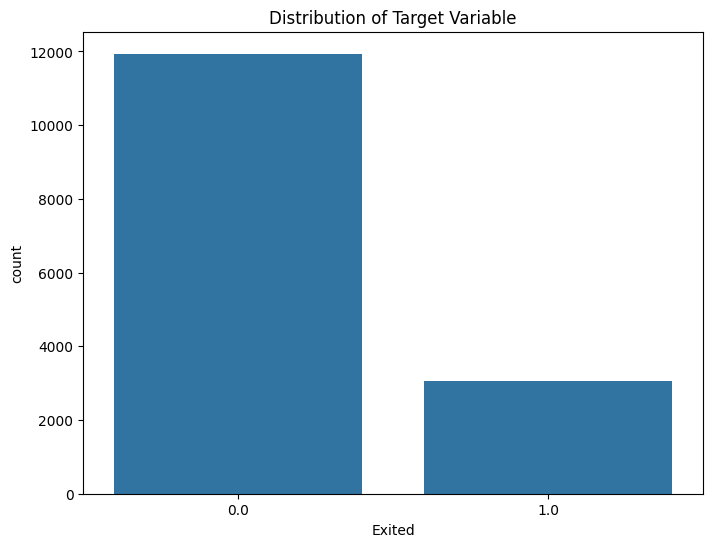

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Exited')
plt.title('Distribution of Target Variable')
plt.show()





Distribution of categorical variable 'Geography':
Geography
France     9046
Spain      3276
Germany    2678
Name: count, dtype: int64


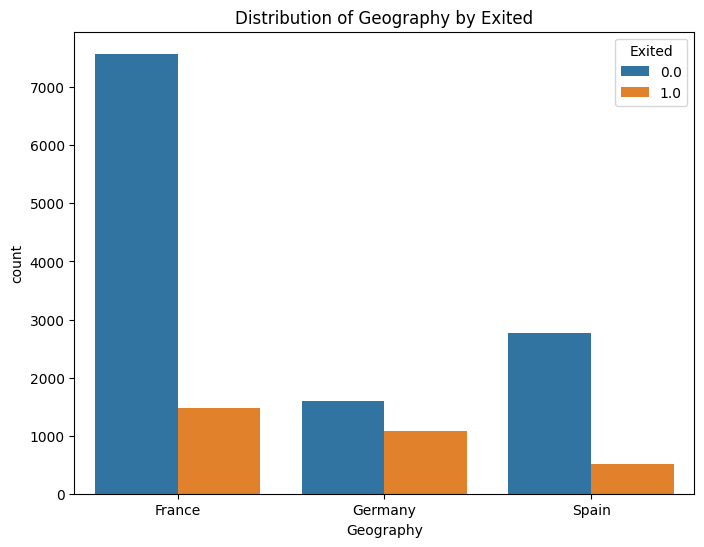


Distribution of categorical variable 'Gender':
Gender
Male      8483
Female    6517
Name: count, dtype: int64


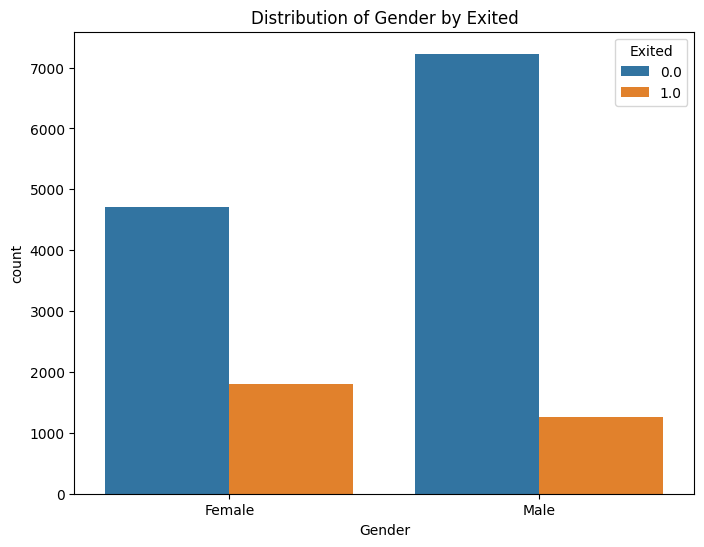


Distribution of categorical variable 'HasCrCard':
HasCrCard
1.0    11777
0.0     3223
Name: count, dtype: int64


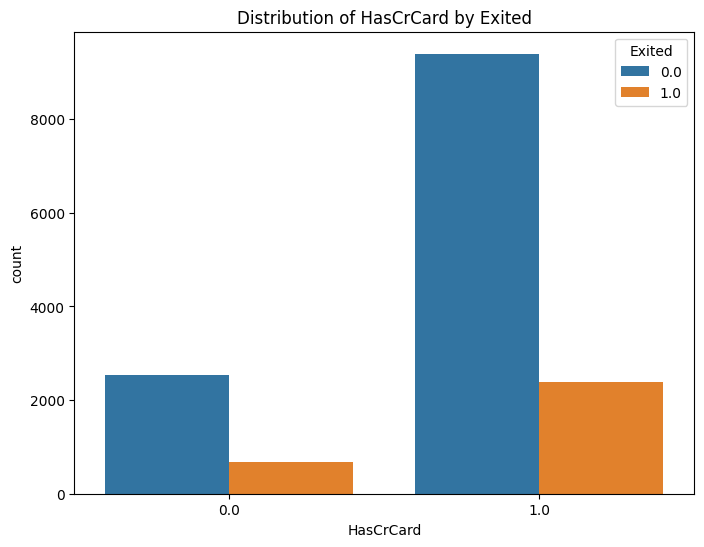


Distribution of categorical variable 'IsActiveMember':
IsActiveMember
0.0    7587
1.0    7413
Name: count, dtype: int64


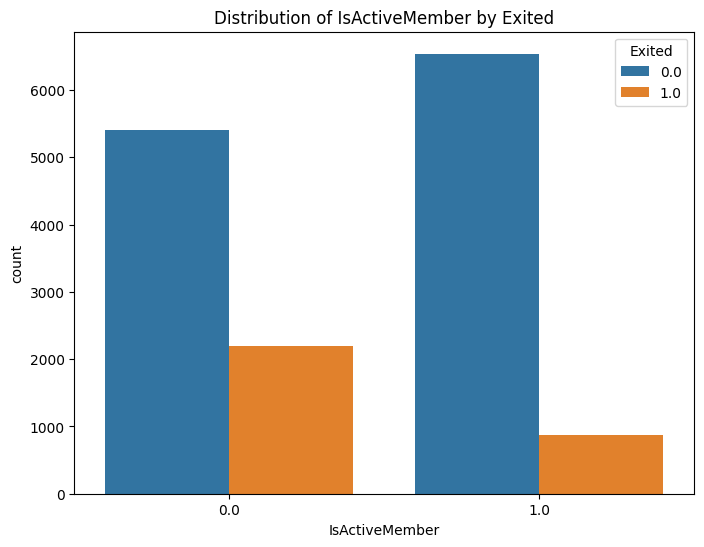

In [38]:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    print(f"\nDistribution of categorical variable '{col}':")
    print(train_data[col].value_counts())
    
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_data, x=col, hue='Exited')
    plt.title(f'Distribution of {col} by Exited')
    plt.show()

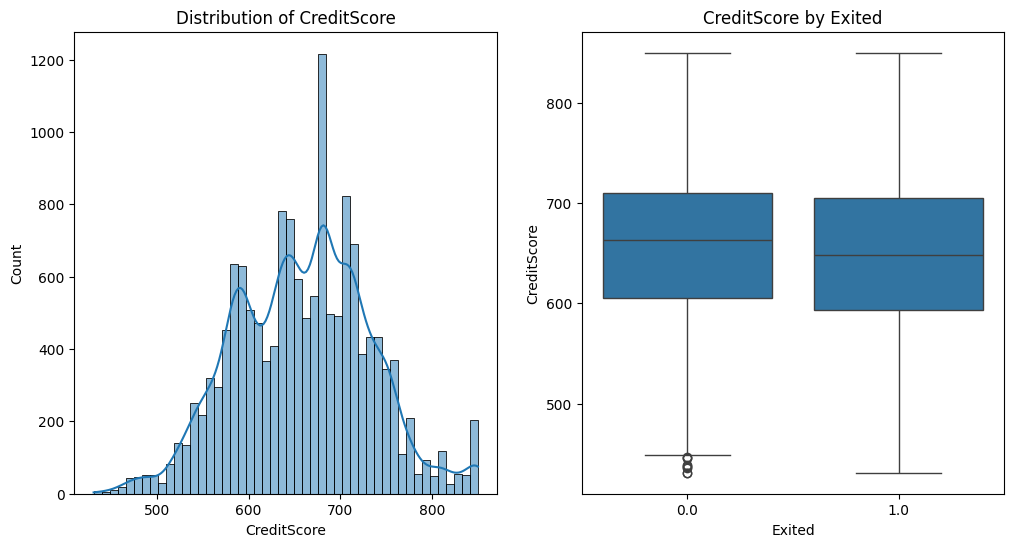

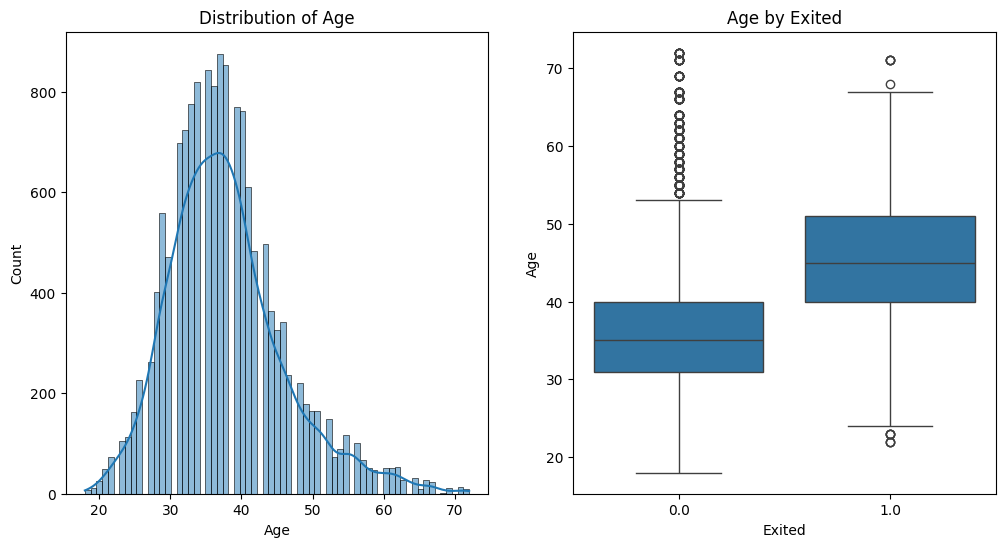

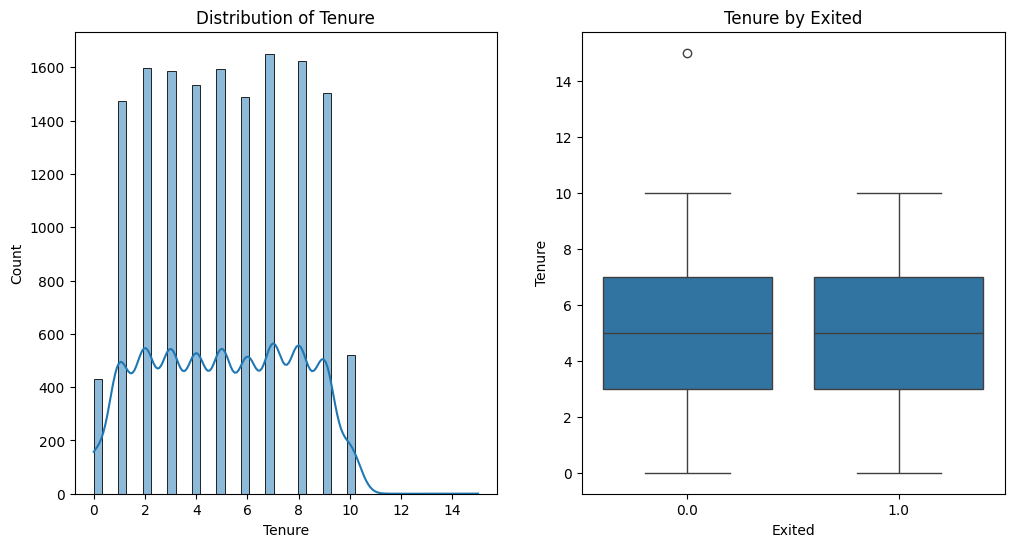

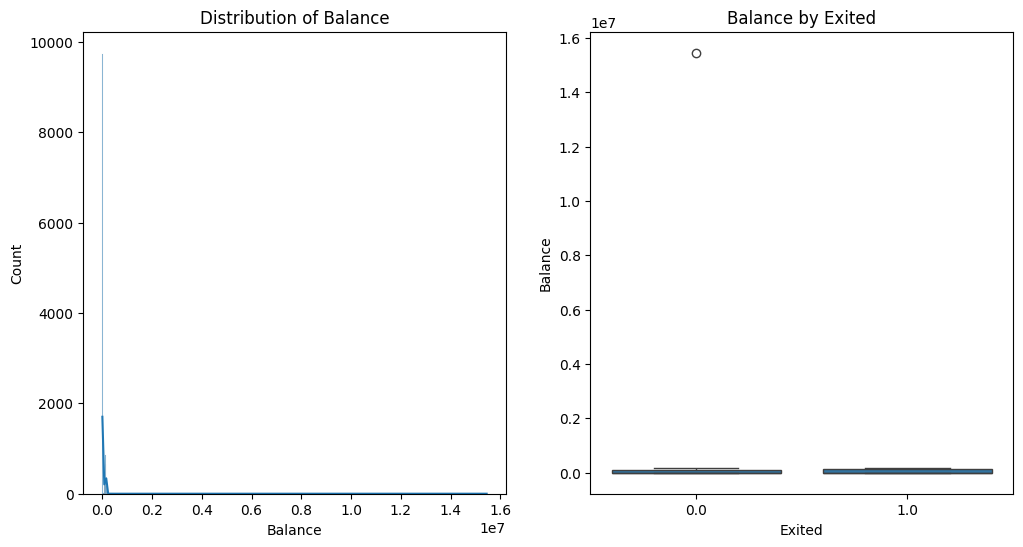

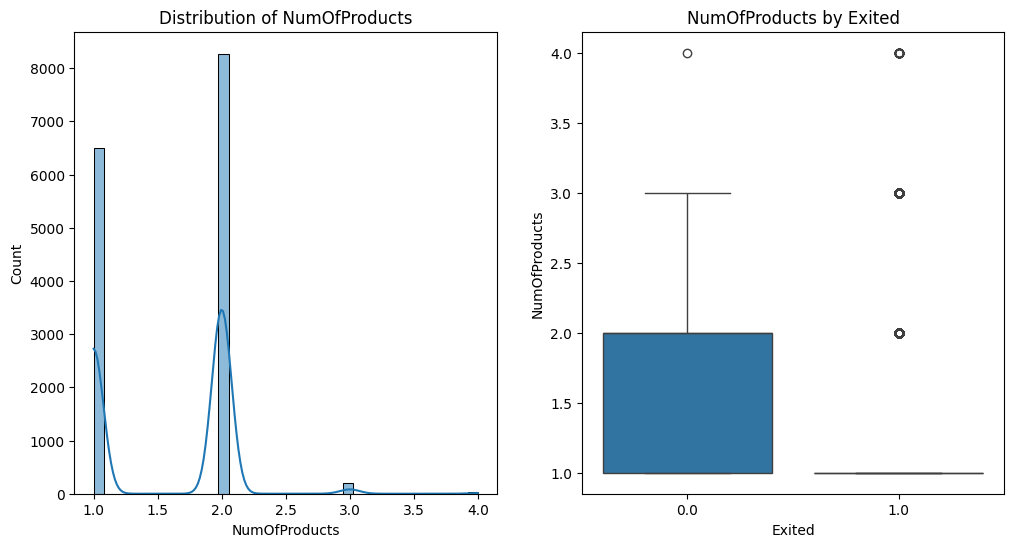

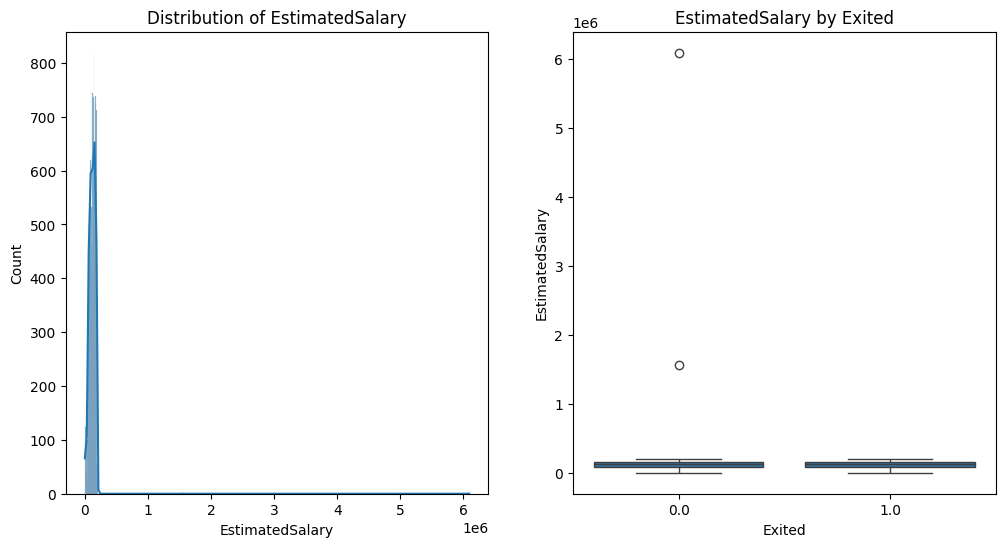

In [39]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=train_data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=train_data, x='Exited', y=col)
    plt.title(f'{col} by Exited')
    
    plt.show()


Correlation matrix:
                       id  CustomerId  CreditScore       Age    Tenure  \
id               1.000000    0.010582     0.001247 -0.004150  0.004433   
CustomerId       0.010582    1.000000     0.007503 -0.003710 -0.006859   
CreditScore      0.001247    0.007503     1.000000 -0.028384  0.006730   
Age             -0.004150   -0.003710    -0.028384  1.000000 -0.025276   
Tenure           0.004433   -0.006859     0.006730 -0.025276  1.000000   
Balance          0.010009    0.009193     0.004746  0.039084  0.003438   
NumOfProducts    0.003479   -0.000242     0.017744 -0.166197  0.024904   
HasCrCard        0.007835   -0.002342     0.010817  0.019778  0.003279   
IsActiveMember   0.001395    0.001954     0.009442 -0.028203 -0.017977   
EstimatedSalary  0.008428   -0.000286     0.004111  0.003611  0.011859   
Exited           0.000212   -0.012916    -0.061725  0.455630 -0.029398   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
id               0.

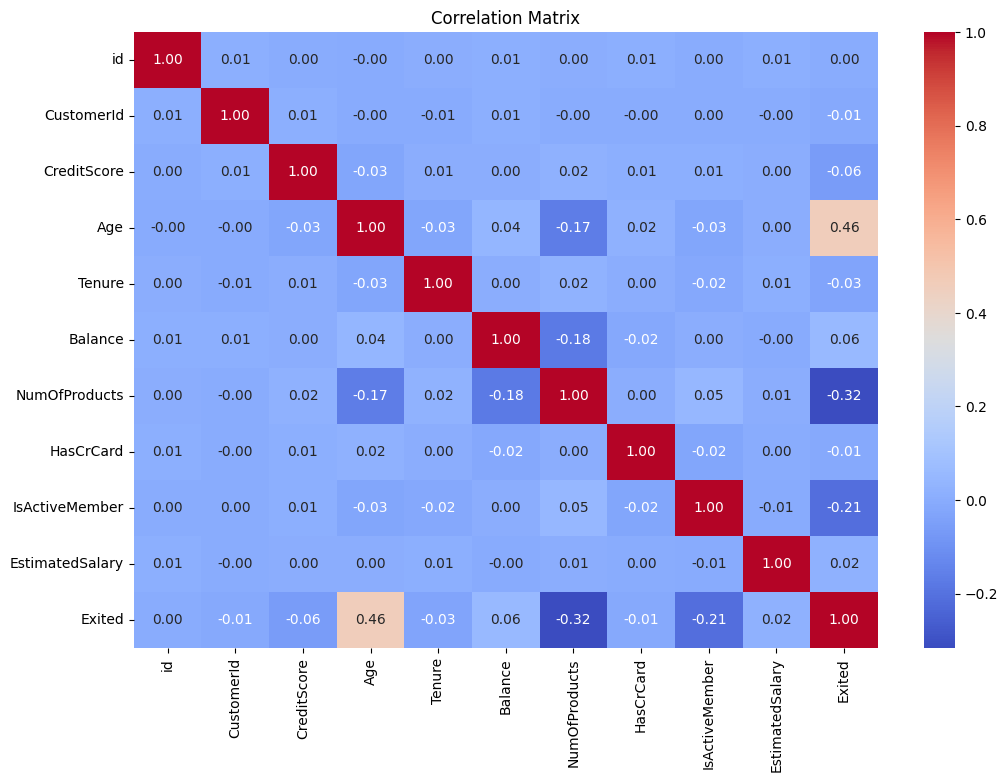

In [41]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_data[numeric_cols].corr()
print("\nCorrelation matrix:")
print(corr_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

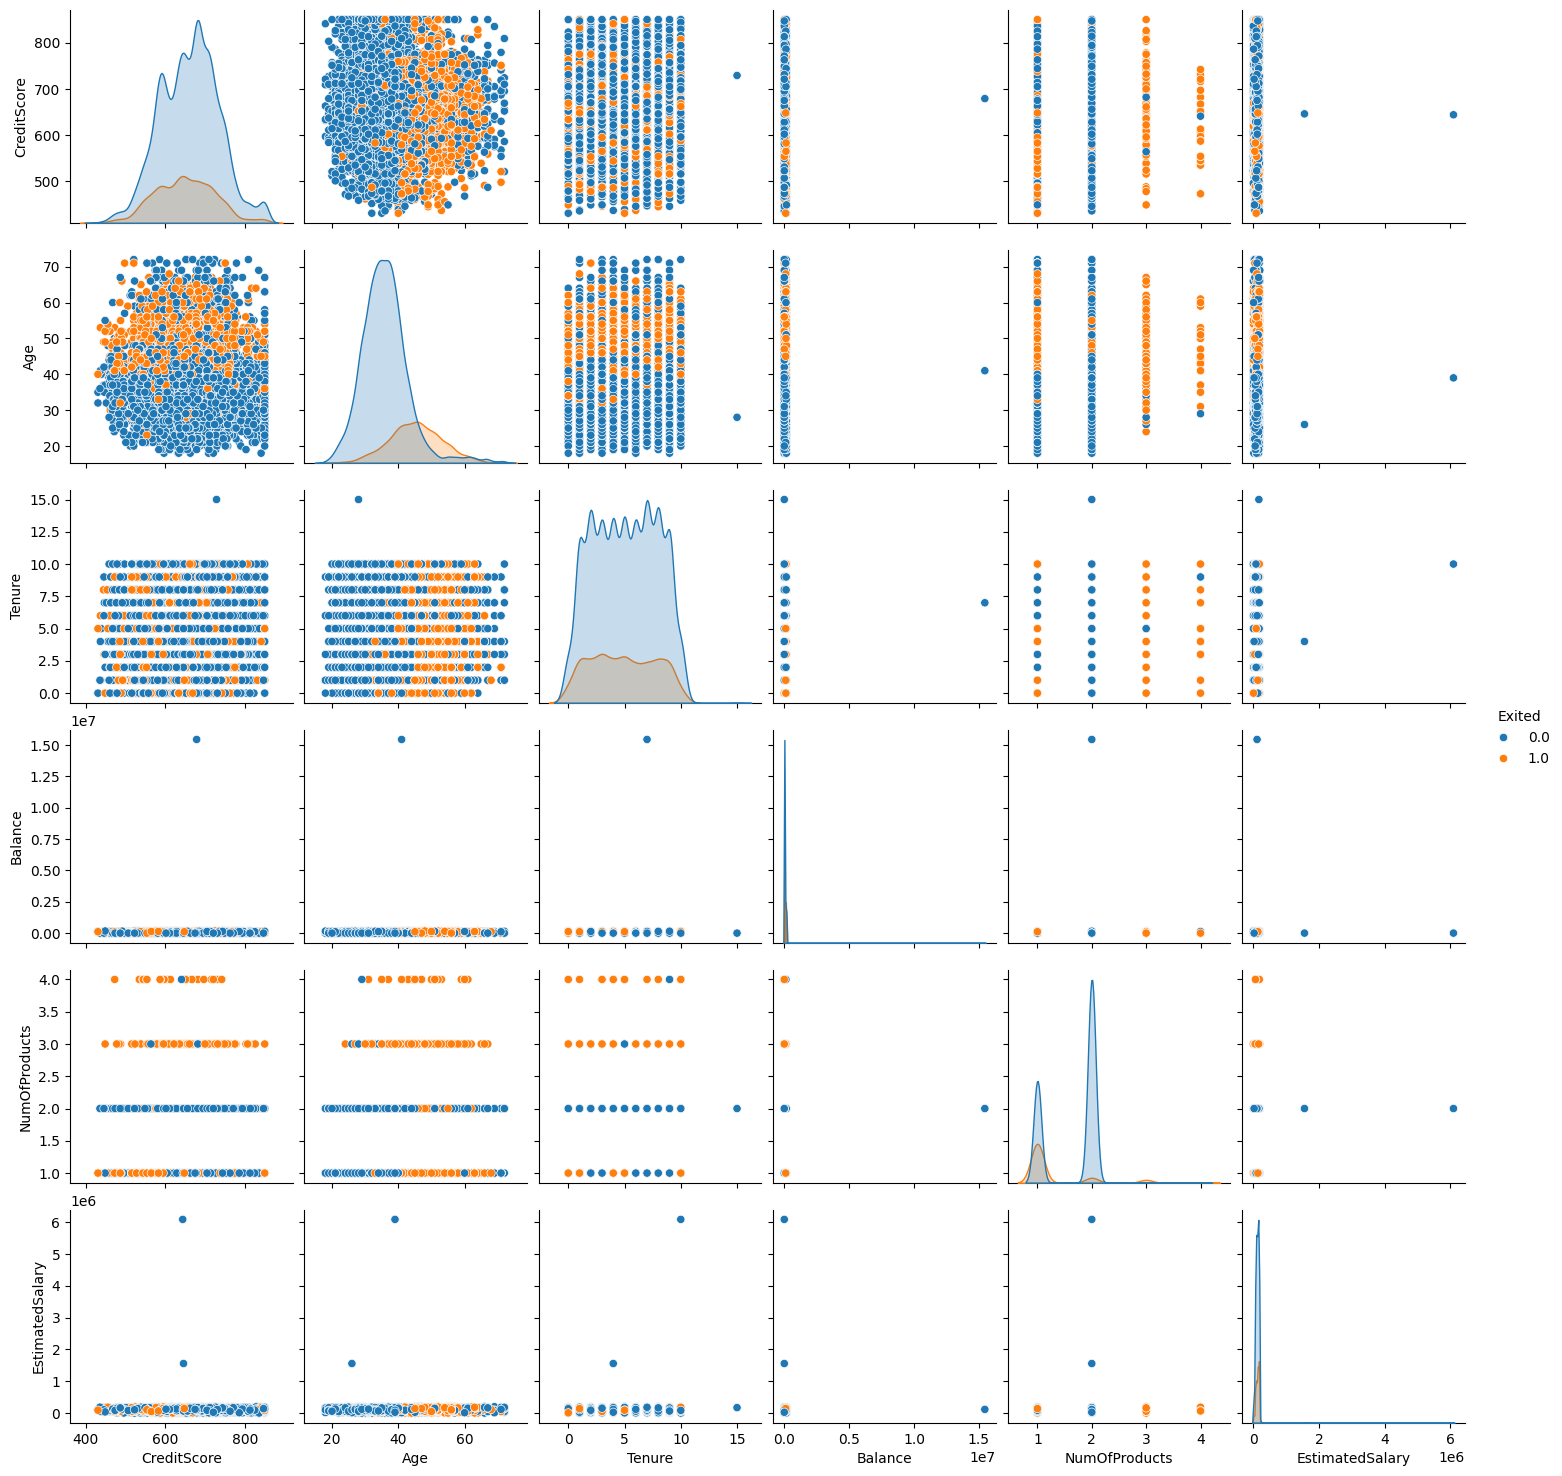

In [42]:
pairplot_cols = numerical_cols + ['Exited']
sns.pairplot(train_data[pairplot_cols], hue='Exited', diag_kind='kde')
plt.show()


Average Credit Score by Geography:
Geography
France     658.736790
Germany    659.694548
Spain      658.380342
Name: CreditScore, dtype: float64


C:\Users\balda\AppData\Local\Temp\ipykernel_34856\3493458374.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_credit_score_by_geo = train_data.groupby('Geography')['CreditScore'].mean()


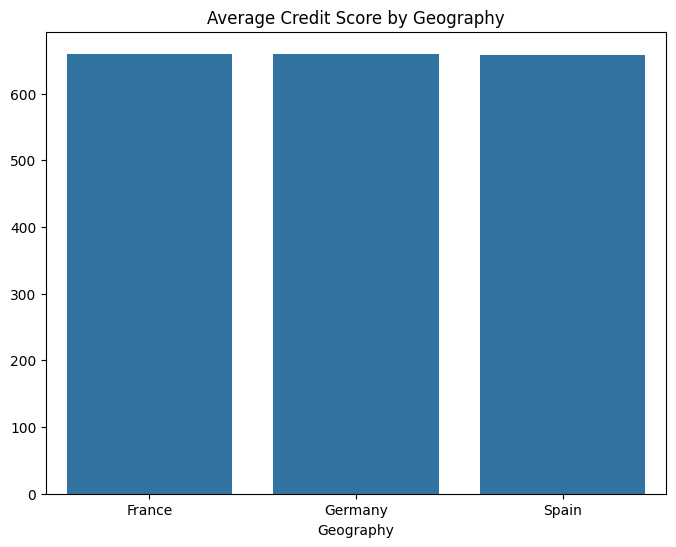

In [43]:
avg_credit_score_by_geo = train_data.groupby('Geography')['CreditScore'].mean()
print("\nAverage Credit Score by Geography:")
print(avg_credit_score_by_geo)

# Visualizing the average credit score by geography
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_credit_score_by_geo.index, y=avg_credit_score_by_geo.values)
plt.title('Average Credit Score by Geography')
plt.show()

In [44]:

X = train_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = train_data['Exited']

X_test = test_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]



In [45]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Geography', 'Gender'], drop_first=True)

X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [46]:
scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])




In [47]:
model = CatBoostClassifier(iterations=10000,  
                           learning_rate=0.1,  
                           depth=7,  #
                           loss_function='Logloss',  
                           eval_metric='F1',  
                           random_seed=32,  
                           logging_level='Silent')  


model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=1)




In [48]:
y_val_pred = model.predict(X_val)

f1 = f1_score(y_val, y_val_pred)
print(f'F1 Score pada data validasi: {f1}')
print(classification_report(y_val, y_val_pred))

F1 Score pada data validasi: 0.7468805704099821
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2386
         1.0       0.82      0.68      0.75       614

    accuracy                           0.91      3000
   macro avg       0.87      0.82      0.84      3000
weighted avg       0.90      0.91      0.90      3000



In [49]:
model.save_model('catboost_model3.cbm')